In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cov = pd.read_csv('2019_nCoV_data.csv')
df_cov.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [4]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
Sno               434 non-null int64
Province/State    349 non-null object
Country           434 non-null object
Last Update       434 non-null object
Confirmed         434 non-null float64
Deaths            434 non-null float64
Recovered         434 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 23.8+ KB


In [6]:
df_cov['Last Update'] = pd.to_datetime(df_cov['Last Update'])

In [10]:
df_cov.set_index('Last Update', inplace = True)

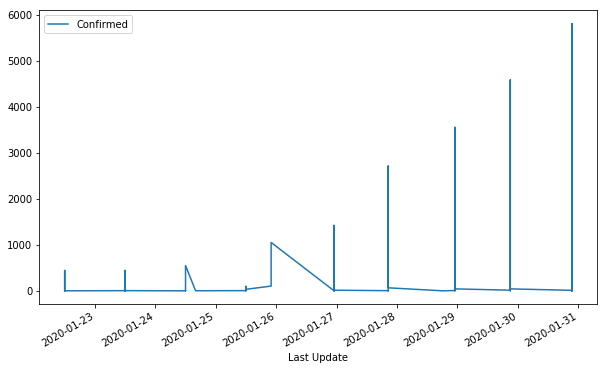

In [22]:
df_cov['Confirmed'].plot(figsize=(10,6), legend = True);

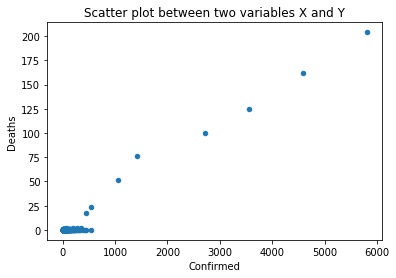

In [82]:
# Exploring the linear relationship between Deaths Patients and Confirmed Cases
df_cov.plot.scatter(x= 'Confirmed', y= 'Deaths', title= "Scatter plot between two variables X and Y");

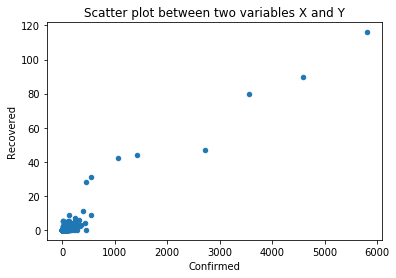

In [83]:
# Exploring the linear relationship between Recovered Patients and Confirmed Cases 
df_cov.plot.scatter(x= 'Confirmed', y= 'Recovered', title= "Scatter plot between two variables X and Y");

In [26]:
df_cov.head()

,Sno,Province/State,Country,Confirmed,Deaths,Recovered
Last Update,,,,,,
2020-01-22 12:00:00,1,Anhui,China,1.0,0.0,0.0
2020-01-22 12:00:00,2,Beijing,China,14.0,0.0,0.0
2020-01-22 12:00:00,3,Chongqing,China,6.0,0.0,0.0
2020-01-22 12:00:00,4,Fujian,China,1.0,0.0,0.0
2020-01-22 12:00:00,5,Gansu,China,0.0,0.0,0.0


In [27]:
df_cov['Country'].value_counts()

Mainland China          243
China                    34
US                       26
Australia                13
South Korea               9
Japan                     9
Thailand                  9
Macau                     8
Canada                    8
Taiwan                    8
Hong Kong                 8
Vietnam                   8
Singapore                 8
Malaysia                  7
France                    7
Nepal                     6
Germany                   4
Cambodia                  4
Sri Lanka                 4
United Arab Emirates      2
Finland                   2
Philippines               2
India                     1
Brazil                    1
Mexico                    1
Italy                     1
Ivory Coast               1
Name: Country, dtype: int64

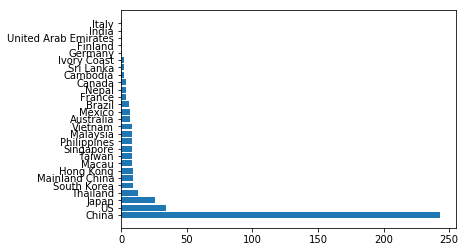

In [43]:
plt.barh(df_cov['Country'].unique(),df_cov['Country'].value_counts());

In [89]:
df_cov['Province/State'].value_counts()

Hebei               9
Sichuan             9
Inner Mongolia      9
Jilin               9
Beijing             9
Guangdong           9
Anhui               9
Shanxi              9
Hunan               9
Taiwan              9
Jiangxi             9
Hong Kong           9
Shaanxi             9
Chongqing           9
Hainan              9
Xinjiang            9
Shanghai            9
Tianjin             9
Ningxia             9
Guizhou             9
Zhejiang            9
Jiangsu             9
Qinghai             9
Hubei               9
Macau               9
Fujian              9
Heilongjiang        9
Washington          9
Guangxi             9
Shandong            9
Liaoning            9
Gansu               9
Yunnan              9
Henan               9
Illinois            6
California          5
Ontario             5
Arizona             5
New South Wales     4
Victoria            4
Tibet               4
Bavaria             4
British Columbia    3
Queensland          2
Chicago             1
Name: Prov

In [74]:
df_cov_china = df_cov[df_cov['Country'] == 'China']

In [105]:
# Percentage of Recovered Patients among the confirmed Patients
recovered_percent = (df_cov['Recovered'].sum() / df_cov['Confirmed'].sum()) * 100
recovered_percent

1.888676499957205

In [104]:
# Percentage of Deaths among the confirmed Patients
death_percent = (df_cov['Deaths'].sum() / df_cov['Confirmed'].sum()) * 100
death_percent

2.2880944908847107

In [106]:
# Percentage of Patiens confirmed affected that have not recovered and died
stillalive = 100 - recovered_percent - death_percent
stillalive

95.82322900915808

In [107]:
# Count the number of Confirmed Patiens
df_cov['Confirmed'].sum()

35051.0

### Note:
- With the analysis shown that 95.82% of Coronavirus affected patients are still waiting to be cure, the current global effort to find a cure for this highly contagious virus are highly necessary.
- With just data from 22/1/2020 to 31/1/2020 which is 10 days, there is already a total of 35051 confirmed cases, it is sure a highly contagious virus that spread very quickly with an average of 3505.1 cases per day.
- Looking at the bar chart, China has the highest amount of patients followed by US, Japan, Thailand and South Korea.
- We also observe an increase in confirmed patients as each day passes
- We can alos observe that the number of confirmed cases is directly proportional to number of death patients and  the number of confirmed cases is directly proportional to the number of recovered patients. 
- Early data shows that the percentage of recovered patients(1.89%) are less than the percentage of deaths among the confirmed cases(2.28%).